In [4]:
!gdown 1KfBK5V59MtQ-CrEEZK0YMfEDDryANhXs

Downloading...
From: https://drive.google.com/uc?id=1KfBK5V59MtQ-CrEEZK0YMfEDDryANhXs
To: /content/heart_disease_health_indicators.csv
100% 11.8M/11.8M [00:00<00:00, 110MB/s]


In [5]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
df = pd.read_csv("/content/heart_disease_health_indicators.csv")
df.keys()

df1 = df[df["HeartDiseaseorAttack"] == 1]
df1 =  df1.iloc[0:100 , :]

df2 = df[df["HeartDiseaseorAttack"] == 0]
df2 = df2.iloc[0:100 , :]

# df=[df1 , df2]
df = pd.concat([df1, df2] , ignore_index=True)

df = shuffle(df)
df = df.reset_index(drop=True)
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,0,1,26,1,0,0,1,1,...,0,0,1,0,1,0,1,4,5,3
1,1,1,1,1,27,1,0,2,0,0,...,1,0,4,0,14,0,0,9,4,4
2,0,0,0,1,28,1,0,0,0,0,...,1,0,3,0,7,0,1,5,5,5
3,1,1,1,1,26,1,0,2,0,1,...,1,0,4,0,0,0,0,10,6,7
4,0,0,0,1,30,1,0,0,1,1,...,1,0,3,10,0,0,1,5,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,1,20,1,0,0,1,0,...,1,0,2,0,0,0,0,7,4,5
196,1,1,1,1,36,1,0,2,0,1,...,1,0,4,0,0,1,1,12,6,6
197,0,1,0,1,31,0,0,2,0,1,...,1,0,3,0,5,0,0,13,4,4
198,0,0,0,1,32,0,0,0,1,0,...,1,0,3,0,0,0,0,7,4,3


In [6]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
X = df[df.columns[1:]].values

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression , SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

y = df[["HeartDiseaseorAttack"]].values
X ,y

(array([[ 0,  0,  1, ...,  4,  5,  3],
        [ 1,  1,  1, ...,  9,  4,  4],
        [ 0,  0,  1, ...,  5,  5,  5],
        ...,
        [ 1,  0,  1, ..., 13,  4,  4],
        [ 0,  0,  1, ...,  7,  4,  3],
        [ 1,  1,  1, ..., 12,  6,  8]]),
 array([[0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1

In [8]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
x_train.shape , x_test.shape , y_train.shape , y_test.shape


((160, 21), (40, 21), (160, 1), (40, 1))

In [9]:
model = LogisticRegression(solver = 'sag', max_iter = 4000 , random_state = 93)
model.fit(x_train , y_train)
y_hat = model.predict(x_test)
model.predict(x_test) , y_test
# y_hat.shape

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]),
 array([[0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0]]))

In [10]:
model.score(x_test , y_test)

0.6

In [11]:
model.score(x_train , y_train)

0.75

In [12]:
 from sklearn.metrics import accuracy_score
 score = accuracy_score(y_test, y_hat)
 score

0.6

In [13]:
model1 = SGDClassifier(loss = 'log_loss' , random_state = 93)
model1.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', random_state=93)

In [42]:
y_hat1 = model1.predict(x_test)

In [15]:
y_hat1 , y_test

((array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
         1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]),
  array([[0],
         [0],
         [1],
         [0],
         [1],
         [1],
         [0],
         [1],
         [1],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [0],
         [1],
         [1],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [1],
         [1],
         [0],
         [1],
         [1],
         [0],
         [0]])),
 array([[0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1]

In [16]:
model1.score(x_test , y_test)

0.575

In [17]:
model1.score(x_train , y_train)

0.66875

In [43]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, y_hat1)
score1

0.575

In [18]:
from sklearn.linear_model import Perceptron
model2 = Perceptron(random_state = 93)
model2.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(random_state=93)

In [19]:
model2.score(x_train , y_train)

0.525

In [20]:
model2.score(x_test , y_test)

0.55

In [37]:
y_hat2 = model2.predict(x_test)

In [39]:
 from sklearn.metrics import accuracy_score
 score = accuracy_score(y_test, y_hat2)
 score

0.55

In [22]:
y_hat2 , y_test

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]),
 array([[0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0]]))

In [23]:
from sklearn.metrics import log_loss

In [24]:
error = log_loss(y_test , y_hat)
y_test.shape, y_hat.shape

((40, 1), (40,))

In [25]:
y_hat

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

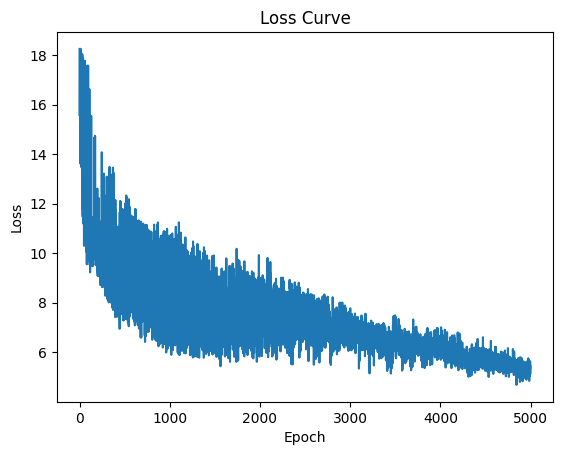

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss


model = SGDClassifier(loss='log', random_state=83)
losses = []
epochs = 5000

for i in range(epochs):

    model.partial_fit(x_train, y_train , [0,1])
    loss = log_loss(y_train , model.predict_proba(x_train))
    losses.append(loss)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


In [28]:
#bakhshe akhar
from sklearn.metrics import confusion_matrix , f1_score
import matplotlib.pyplot as plt

In [29]:
cm = confusion_matrix(y_test , y_hat)
F1 = f1_score(y_test , y_hat , average=None)
F1

array([0.55555556, 0.63636364])

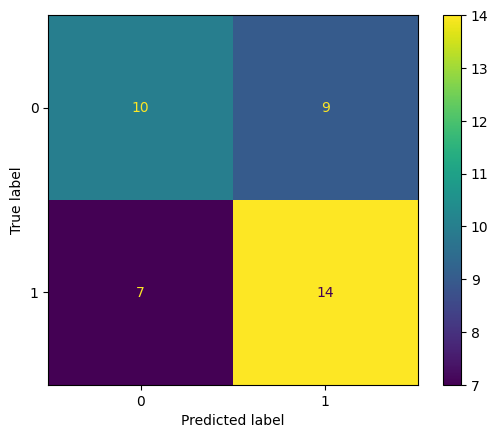

In [44]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()